In [1]:
%matplotlib widget

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import sys

from pymoo.indicators.igd import IGD
from pymoo.indicators.hv import HV

In [3]:
condbased_res1000 = pd.read_csv("locomotec-res-condfuzz-python", delim_whitespace=True)
condbased_res1000

,Testing,uvMissSurface,uvDisinfectionS1,uvDisinfectionS2,uvDisinfectionS3,uvExposureForHuman_p1,uvExcessHuman,fuzzOpTimes,FuzzingOp
0,Test:Test_455_19_11_2022_18_21_08,4.72,10.88,1.62,1.06,18.68,15.68,266.67,2:distortPersonSector([0.59-1.09])ConditionBas...
1,Test:Test_774_20_11_2022_12_24_28,4.74,10.67,1.59,1.07,18.65,15.65,266.85,2:distortPersonSector([1.34-1.45])ConditionBas...
2,Test:Test_812_20_11_2022_14_46_18,1.49,21.80,2.19,12.89,0.24,0.00,0.00,0:
3,Test:Test_957_20_11_2022_23_16_10,11.10,0.00,0.00,0.00,0.00,0.00,124.89,2:distortPersonSector([-1.30--1.28])ConditionB...
4,Test:Test_992_21_11_2022_01_45_56,0.00,20.08,6.64,7.69,15.44,12.44,102.49,1:distortPersonSector([1.47-1.49])ConditionBas...
5,Test:Test_603_20_11_2022_02_38_16,5.83,13.14,0.86,0.71,10.41,7.41,200.92,2:personDetectionPacketLossAll([0.00-0.00])Con...
6,Test:Test_001_18_11_2022_19_05_10,10.80,0.02,0.00,0.28,0.00,0.00,81.07,2:personDetectionPacketLoss([0.42-0.63])Condit...
7,Test:Test_999_21_11_2022_01_45_56,2.16,19.33,1.54,7.36,14.93,11.93,154.13,2:personDetectionPacketLossAll([0.00-0.00])Con...
8,Test:Test_785_20_11_2022_12_59_49,3.01,12.27,0.69,12.61,4.76,1.76,143.14,2:distortPersonSector([-1.30--1.28])ConditionB...
9,Test:Test_822_20_11_2022_15_22_01,2.82,21.05,0.88,11.58,7.39,4.39,58.03,2:distortPersonSector([1.16-1.35])ConditionBas...


In [4]:
condbased_res250 = pd.read_csv("locomotec-history-condfuzz-250", delim_whitespace=True)
condbased_res500 = pd.read_csv("locomotec-history-condfuzz-500", delim_whitespace=True)
condbased_res750 = pd.read_csv("locomotec-history-condfuzz-750", delim_whitespace=True)

In [5]:
def dataframe_chosen_cols_to_csv(df, csv_file):
    subset_df = df[['uvMissSurface','uvExcessHuman','fuzzOpTimes']].copy()
    subset_df.to_csv(csv_file, index=False, header=False)

In [6]:
condbased_res250[['uvMissSurface','uvExcessHuman','fuzzOpTimes']]

,uvMissSurface,uvExcessHuman,fuzzOpTimes
0,1.836,7.969,143.418
1,11.100,0.000,128.243
2,0.000,10.031,135.349
3,0.000,5.543,88.161
4,2.571,0.000,10.337
5,10.796,0.000,81.065
6,0.000,1.131,65.205
7,0.000,1.496,85.341
8,0.000,9.592,133.272
9,0.000,7.842,108.669


In [7]:
dataframe_chosen_cols_to_csv(condbased_res1000, "condbased_res1000.pf")
dataframe_chosen_cols_to_csv(condbased_res250,  "condbased_history250.pf")
dataframe_chosen_cols_to_csv(condbased_res500,  "condbased_history500.pf")
dataframe_chosen_cols_to_csv(condbased_res750,  "condbased_history750.pf")

In [8]:
def plot_3d_resultset_history(frontDFAttribs, graph_title, savefigFilename):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')    
    default_alpha = 1.0
    
    for col in frontDFAttribs:
        df = frontDFAttribs[col]
        ax.scatter(df["uvMissSurface"], df["uvExcessHuman"], df["fuzzOpTimes"], c=col, alpha=default_alpha)

    ax.view_init(20,110)

    ax.set_xlabel("UVC Disinfection\n Surface Miss")
    ax.set_ylabel("UVC Excess\n Human Exposure")
    ax.set_zlabel("Fuzzing Operation Times")
    ax.set_title(graph_title)
    plt.tight_layout(pad=0.05)
    #plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
    plt.savefig(savefigFilename)
    plt.show()

In [9]:
def plot_3d_resultset_history_as_subplots(frontDFAttribs, graph_title, savefigFilename, xmax, ymax, zmax):
    labelfont = 8
    titlefont = 10
    xwidth = 2
    xp = xwidth
    yp = int(len(frontDFAttribs) / xwidth)
    fig = plt.figure()
    default_alpha = 1.0
    
    ai = 1
    for itercount in frontDFAttribs:
        info = frontDFAttribs[itercount]
        df = info['front']
        col = info['col']
        title = info['title']
        
        ax = fig.add_subplot(xp, yp, ai, projection="3d") 
        ax.scatter(df["uvMissSurface"], df["uvExcessHuman"], df["fuzzOpTimes"], c=col, alpha=default_alpha)
        
        ax.view_init(20,110)
        ax.set_xlim(0, xmax)
        ax.set_ylim(0, ymax)
        ax.set_zlim(0, zmax)
        ax.set_title(title, fontsize=titlefont)
        ax.set_xlabel("UVC Disinfection\n Surface Miss", fontsize=labelfont)
        ax.set_ylabel("UVC Excess\n Human Exposure", fontsize=labelfont)
        ax.set_zlabel("Total Fuzzing \nOperation Times", fontsize=labelfont)
        
        ai += 1

    plt.suptitle(graph_title)
    plt.tight_layout(pad=0.05)
    plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.55)
    plt.savefig(savefigFilename)
    plt.show()


In [1]:
def plot_3d_resultset_history_individual_plots(frontDFAttribs, graph_title, savefigFilename, xmax, ymax, zmax):
    labelfont = 10
    titlefont = 16
    xwidth = 2
    markersize=5
    xp = xwidth
    yp = int(len(frontDFAttribs) / xwidth)
    default_alpha = 1.0
    
    for itercount in frontDFAttribs:
        info = frontDFAttribs[itercount]
        df = info['front']
        col = info['col']
        #title = info['title']

        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')
        individualFile = "rq3-locomotec-3dfront-history_" + info["filetag"] + ".pdf"
        
        ax.scatter(df["uvMissSurface"], df["uvExcessHuman"], df["fuzzOpTimes"], c=col, alpha=default_alpha, s=markersize)
        ax.view_init(20,110)
        ax.set_xlim(0, xmax)
        ax.set_ylim(0, ymax)
        ax.set_zlim(0, zmax)
        #ax.set_title(title, fontsize=titlefont)
        ax.set_xlabel("UVC Disinfection Surface Miss", fontsize=labelfont)
        ax.set_ylabel("UVC Excess Human Exposure", fontsize=labelfont)
        ax.set_zlabel("Total Fuzzing Operation Times", fontsize=labelfont)
        plt.tight_layout()
        plt.savefig(individualFile)

In [2]:
res_df_attribs = {250 : {'front' : condbased_res250, 'col':"black",  'title': "25% of experiment", 'filetag':"250"},
                  500 : {'front' : condbased_res500, 'col':"orange", 'title': "50% of experiment", 'filetag':"500"}, 
                  750 : {'front' : condbased_res750, 'col':"purple", 'title': "75% of experiment", 'filetag':"750"},
                  1000 : {'front': condbased_res1000, 'col':"green", 'title': "Completed experiment", 'filetag':"1000"}}

xmax = 12
ymax = 18
zmax = 300

plot_3d_resultset_history_individual_plots(res_df_attribs, "Condition-based fuzzing\n Pareto front over time", ".pdf", xmax, ymax, zmax)
#plot_3d_resultset_history_as_subplots(res_df_attribs, "Condition-based fuzzing\n Pareto front over time", "rq3-locomotec-3dfront-history.pdf", xmax, ymax, zmax)

NameError: name 'condbased_res250' is not defined

In [15]:
def max_point_from_front(pf):
    return np.array([np.max(pf.uvMissSurface), np.max(pf.uvExcessHuman), np.max(pf.fuzzOpTimes)])

In [13]:
def max_point_all_fronts(pf_list):
    max_points_2d = np.column_stack(list(map(lambda pf: max_point_from_front(pf), pf_list)))
    max_of_all = np.amax(max_points_2d, axis=1)
    return max_of_all

In [12]:

max_point_all_fronts([condbased_res250, condbased_res500, condbased_res750, condbased_res1000])

array([ 11.1  ,  15.68 , 267.353])

In [13]:
front_info = {'condbased_history250.pf' : {}, 
              'condbased_history500.pf' : {}, 
              'condbased_history750.pf' : {},
              'condbased_res1000.pf' : {}}

for front in [condbased_res250, condbased_res500, condbased_res750, condbased_res1000]:
    front.uvMissSurface *= -1
    front.uvExcessHuman *= -1
    
ref_point = max_point_all_fronts([condbased_res250, condbased_res500, condbased_res750, condbased_res1000])
ref_point
 

array([ -0.   ,  -0.   , 267.353])

In [14]:
def indicators_for_intermediate_fronts(front_info):
    # Reference point is obtained as the max point from all fronts
    #ref_point = max_point_all_fronts([condbased_res250, condbased_res500, condbased_res750, condbased_res1000])
    for front in [condbased_res250, condbased_res500, condbased_res750, condbased_res1000]:
        front.uvMissSurface *= -1
        front.uvExcessHuman *= -1
    
    ref_point = max_point_all_fronts([condbased_res250, condbased_res500, condbased_res750, condbased_res1000])
    ref_front = np.loadtxt(open("condbased_res1000.pf", "rb"), delimiter=",")
    ref_front[:,0] *= -1
    ref_front[:,1] *= -1
    print("Ref point=" + str(ref_point))
    
    for pf_file in front_info:
        front = np.loadtxt(open(pf_file, "rb"), delimiter=",")
        front[:,0] *= -1
        front[:,1] *= -1
        front_attribs = front_info[pf_file]
        hv_ind = HV(ref_point=ref_point)
        igd_ind = IGD(front)
        hv_val = hv_ind(front)
        igd_val = igd_ind(ref_front)
        front_attribs['HV'] = hv_val
        front_attribs['IGD'] = igd_val

In [15]:
front = np.loadtxt(open("condbased_history250.pf", "rb"), delimiter=",")
front[:,0] *= -1
front[:,1] *= -1
front

array([[ -1.836,  -7.969, 143.418],
       [-11.1  ,  -0.   , 128.243],
       [ -0.   , -10.031, 135.349],
       [ -0.   ,  -5.543,  88.161],
       [ -2.571,  -0.   ,  10.337],
       [-10.796,  -0.   ,  81.065],
       [ -0.   ,  -1.131,  65.205],
       [ -0.   ,  -1.496,  85.341],
       [ -0.   ,  -9.592, 133.272],
       [ -0.   ,  -7.842, 108.669],
       [-10.831,  -0.   , 108.377],
       [ -2.547,  -0.   ,   9.637],
       [-10.843,  -0.   , 109.37 ],
       [-11.052,  -0.   , 122.591],
       [-11.085,  -0.   , 123.498],
       [ -2.551,  -0.   ,  10.258],
       [-10.836,  -0.   , 108.868],
       [-11.081,  -0.   , 123.103],
       [-11.077,  -0.   , 122.793]])

In [16]:
front_info = {'condbased_history250.pf' : {}, 
              'condbased_history500.pf' : {}, 
              'condbased_history750.pf' : {},
              'condbased_res1000.pf' : {}}

indicators_for_intermediate_fronts(front_info)
front_info

Ref point=[ 11.1    15.68  267.353]

Compiled modules for significant speedup can not be used!
https://pymoo.org/installation.html#installation

To disable this warning:
from pymoo.config import Config
Config.warnings['not_compiled'] = False



{'condbased_history250.pf': {'HV': 100403.46133222, 'IGD': 6.790961327654149},
 'condbased_history500.pf': {'HV': 110966.808672459, 'IGD': 5.662991193398295},
 'condbased_history750.pf': {'HV': 114741.62687204, 'IGD': 3.8600333045017927},
 'condbased_res1000.pf': {'HV': 120560.7032692, 'IGD': 0.0}}

TypeError: cannot unpack non-iterable Figure object

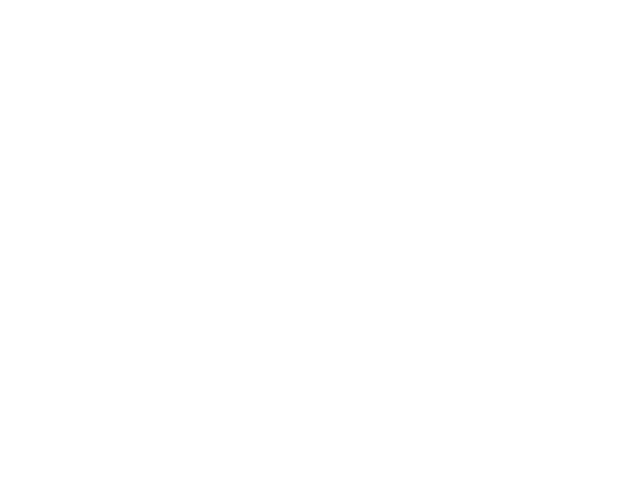

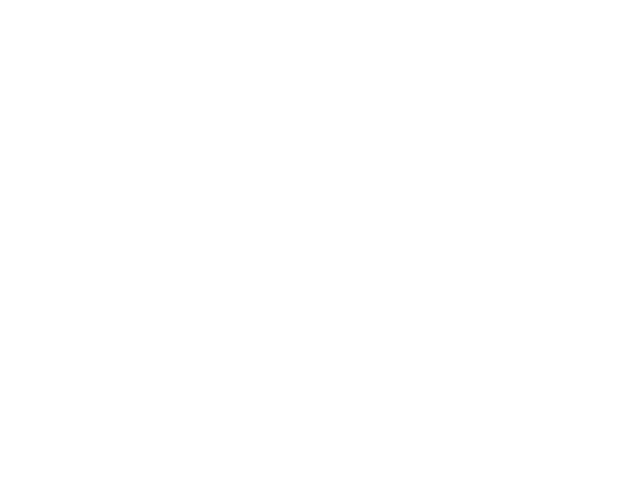